In [1]:
#import the library to query a website
from bs4 import BeautifulSoup
import requests
import pandas as pd
import htmldate
import urllib.request
import os
import collections
import re
import csv
import pickle
import time
import pprint
from htmldate import find_date
from collections import Counter
from datetime import datetime, timedelta

#creating the scraper function
def scraper(keyword) :
    print("Searching....")
    date_sentiments = {}
    article_text = {}
    counter = 1
    
    for i in range (1,30):
        mint_link="https://www.livemint.com/searchlisting/"+str(i)+"/"+keyword #specify the URL
        link=requests.get(mint_link).text
    #Parsing headlines
        soup = BeautifulSoup(link, 'lxml')
        posts = soup.find_all('h2',{'class' :"headline"})
        for post in posts:  
                time.sleep(0.10)
                url=post.a['href']
                c_url="https://www.livemint.com"+url
                date = find_date(c_url)
                print("Article count: ", counter)
                print("Date: ", date)
                print(post.text)
                print("URL:",c_url)
                counter += 1
                #open the article via the link
                user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
                headers={'User-Agent':user_agent,}
                try:
                    request=urllib.request.Request(c_url,None,headers)
                    response = urllib.request.urlopen(request)
                    link_page = response.read()
                except:
                    url = c_url[:-2]
                    link_page = urlopen(url).read()
                    request=urllib.request.Request(url,None,headers)
                    response = urllib.request.urlopen(request)
                    link_page = response.read()
                #read the article
                link_soup = BeautifulSoup(link_page,'lxml')
                sentences = link_soup.find_all("p")
                passage = ""
                for sentence in sentences:
                    passage += sentence.text  
                    article_text.setdefault(date, []).append(passage)
    articles = {}
    for k,v in article_text.items():
        articles[datetime.strptime(k, '%Y-%m-%d').date() + timedelta(days=1)] = v 
    return articles

# runs scraper function with search term that is the company name
articles = scraper("RIL")

# converts the dict into a pandas data frame and 
# deals with articles that appear on same date (creating more than one content column)
df = pd.DataFrame.from_dict(articles,orient='index')
df=df.loc[:, :'1'] 
df.rename(columns = {0:'date'}, inplace=True)
df.drop('date', axis=1, inplace=True)
df.rename(columns = {1:'content'}, inplace=True)
df.head(50)

Searching....
Article count:  1
Date:  2020-10-15

There was no other answer but to exit biz, says Biyani
URL: https://www.livemint.com/companies/news/there-was-no-other-answer-but-to-exit-biz-says-biyani-11602723018745.html
Article count:  2
Date:  2020-10-14

RIL plans foray into smart electricity meter business
URL: https://www.livemint.com/companies/news/ril-plans-foray-into-smart-electricity-meter-business-11602641529726.html
Article count:  3
Date:  2020-10-13

RIL now eyes smart electricity meter business
URL: https://www.livemint.com/companies/news/ril-now-eyes-smart-electricity-meter-business-11602570157205.html
Article count:  4
Date:  2020-10-13

Stocks to Watch: Reliance, Maruti, banks, Infosys, SRF, Wipro
URL: https://www.livemint.com/market/stock-market-news/stocks-to-watch-reliance-maruti-banks-infosys-srf-11602552760819.html
Article count:  5
Date:  2020-10-08

India was stuck with 2G before Jio ended country's data misery: Mukesh Ambani
URL: https://www.livemint.com/in

Article count:  36
Date:  2020-09-22

Eye on rivals' subscribers, Jio announces new postpaid plans
URL: https://www.livemint.com/companies/news/eye-on-rivals-subscribers-jio-announces-new-postpaid-plans-11600772335864.html
Article count:  37
Date:  2020-09-21

RIL’s dominance is reason behind $200 bn valuation
URL: https://www.livemint.com/market/mark-to-market/ril-s-dominance-is-reason-behind-200-bn-valuation-11600655736281.html
Article count:  38
Date:  2020-09-21

Stocks to Watch: Route Mobile, HCL Tech, RIL, Bharti Airtel, Bank of India
URL: https://www.livemint.com/market/stock-market-news/stocks-to-watch-route-mobile-hcl-tech-ril-bharti-airtel-bank-of-india-11600655792489.html
Article count:  39
Date:  2020-09-17

Stocks to Watch: RIL, Infosys, pharma stocks, BPCL, Motherson Sumi
URL: https://www.livemint.com/market/stock-market-news/stocks-to-watch-ril-infosys-pharma-stocks-bpcl-motherson-sumi-11600306002062.html
Article count:  40
Date:  2020-09-17

Reliance market cap hits  ₹1

Article count:  72
Date:  2020-09-07

Stocks to Watch: RIL, Maruti Suzuki, State Bank of India, Vodafone Idea
URL: https://www.livemint.com/market/stock-market-news/stocks-to-watch-ril-maruti-suzuki-state-bank-of-india-vodafone-idea-11599441378029.html
Article count:  73
Date:  2020-09-06

RIL to spin off oil to chemicals biz
URL: https://www.livemint.com/companies/news/ril-details-plan-to-carve-out-o2c-assets-11599407935710.html
Article count:  74
Date:  2020-09-06

Eight of top-10 valued firms lose  ₹1.11 lakh cr in market cap
URL: https://www.livemint.com/market/stock-market-news/eight-of-top-10-valued-firms-lose-rs-1-11-lakh-cr-in-market-cap-icici-ril-worst-hit-11599368055607.html
Article count:  75
Date:  2020-09-05

RIL offers investors in Jio a slice of retail pie
URL: https://www.livemint.com/companies/news/ril-offers-investors-in-jio-a-slice-of-retail-pie-11599268018369.html
Article count:  76
Date:  2020-09-04

Future Retail clocks  ₹471 crore loss in Q4
URL: https://www.live

Article count:  107
Date:  2020-08-17

Markets may rise following global peers; Reliance, telcos, ICICI Bank in focus
URL: https://www.livemint.com/market/stock-market-news/markets-may-rise-following-global-peers-reliance-telcos-icici-bank-in-focus-11597633249188.html
Article count:  108
Date:  2020-08-17

Trade volatile; Sensex closes 173 points higher, Nifty above 11,250
URL: https://www.livemint.com/market/stock-market-news/live-blog-sensex-nifty-live-today-17-08-2020-nifty-nse-bse-news-updates-market-live-11597631235450.html
Article count:  109
Date:  2020-08-17

Stocks to Watch: RIL, ICICI Bank, Infosys, Glenmark Pharma, Wipro, Berger Paints
URL: https://www.livemint.com/market/stock-market-news/stocks-to-watch-ril-icici-bank-infosys-glenmark-pharma-wipro-berger-paints-11597630102756.html
Article count:  110
Date:  2020-08-16

Six of 10 top valued firms lose  ₹78,275.12 cr in m-cap
URL: https://www.livemint.com/market/stock-market-news/six-of-10-top-valued-firms-lose-78-275-12-cr-

Article count:  142
Date:  2020-07-30

Markets in crucial zone, say analysts as Sensex, Nifty fall for second day
URL: https://www.livemint.com/market/stock-market-news/sensex-nifty-fall-for-second-day-markets-in-crucial-zone-say-analysts-11596114726860.html
Article count:  143
Date:  2020-07-30

Leads to watch out for in Reliance Industries April-June earnings
URL: https://www.livemint.com/news/india/leads-to-watch-out-for-in-reliance-industries-april-june-earnings-11596082055741.html
Article count:  144
Date:  2020-07-30

Ambani's confidant PMS Prasad pledges over 90% of his Reliance Industries shares
URL: https://www.livemint.com/news/india/ambani-s-confidant-pms-prasad-pledges-over-90-of-his-reliance-industries-shares-11596081446682.html
Article count:  145
Date:  2020-07-30

Jio to cushion Reliance April-June earnings hit from refining and retail
URL: https://www.livemint.com/news/india/jio-to-cushion-reliance-april-june-earnings-hit-from-refining-and-retail-11596080211339.html
Ar

Article count:  176
Date:  2020-07-15

RIL aims to become net carbon-zero by 2035: Mukesh Ambani
URL: https://www.livemint.com/companies/people/ril-aims-to-become-net-carbon-zero-by-2035-mukesh-ambani-11594822908373.html
Article count:  177
Date:  2020-07-15

RIL announces strategic initiatives at AGM, raises hopes of investors
URL: https://www.livemint.com/market/mark-to-market/of-monetisation-and-building-moats-ril-agm-raises-investor-hopes-again-11594819323140.html
Article count:  178
Date:  2020-07-15

RIL to replace auto fuels with electricity, hydrogen, targets carbonzero by 2035
URL: https://www.livemint.com/companies/news/reliance-to-replace-auto-fuels-with-electricity-hydrogen-targets-carbon-zero-firm-by-2035-11594818363206.html
Article count:  179
Date:  2020-07-15

RIL AGM: Jio Platforms public listing via IPO on the cards, says Mukesh Ambani
URL: https://www.livemint.com/companies/news/ril-agm-jio-platforms-public-listing-via-ipo-on-the-cards-says-mukesh-ambani-115948065927

Article count:  210
Date:  2020-07-12

Qualcomm Ventures to invest  ₹730 cr in Jio Platforms for 0.15% stake
URL: https://www.livemint.com/companies/news/qualcomm-ventures-to-invest-rs-730-crore-in-jio-platforms-for-0-15-11594567805078.html
Article count:  211
Date:  2020-07-11

Sensex, Nifty week ahead: RIL AGM, key levels and other cues to watch out for
URL: https://www.livemint.com/market/stock-market-news/sensex-nifty-next-week-ril-agm-key-levels-and-other-things-to-watch-out-for-11594438204383.html
Article count:  212
Date:  2020-07-11

Jio Platforms receives  ₹30,000 crore from four investors
URL: https://www.livemint.com/companies/news/jio-platforms-receives-of-rs-30-000-crore-from-four-investors-11594445924202.html
Article count:  213
Date:  2020-07-10

Mukesh Ambani now richer than Warren Buffett as RIL shares break records
URL: https://www.livemint.com/companies/people/mukesh-ambani-now-richer-than-warren-buffett-as-ril-shares-break-records-11594387557865.html
Article count: 

Article count:  244
Date:  2020-06-24

No salary hike for Mukesh Ambani since the last 12 years
URL: https://www.livemint.com/companies/people/no-salary-hike-for-mukesh-ambani-since-the-last-12-years-11592957171453.html
Article count:  245
Date:  2020-06-23

RIL outlines key data monetisation drivers of Jio Platforms
URL: https://www.livemint.com/companies/news/ril-outlines-key-data-monetisation-drivers-of-jio-platforms-11592927216277.html
Article count:  246
Date:  2020-06-23

RIL’s recent fundraise has no precedence in Indian corporate history: Ambani
URL: https://www.livemint.com/companies/people/ril-s-recent-fundraise-has-no-precedence-in-indian-corporate-history-mukesh-ambani-11592924926461.html
Article count:  247
Date:  2020-06-22

Reliance Industries to hold its first virtual AGM
URL: https://www.livemint.com/companies/news/reliance-industries-to-hold-its-first-virtual-agm-11592838328960.html
Article count:  248
Date:  2020-06-22

After TCS, Reliance Industries to hold virtual 

Article count:  277
Date:  2020-06-10

RIL seeks 10% rent waiver from its fuel retailers
URL: https://www.livemint.com/companies/news/ril-seeks-10-rent-waiver-from-its-fuel-retailers-11591809790334.html
Article count:  278
Date:  2020-06-10

RIL seeks 10% rent waiver from its fuel retailers
URL: https://www.livemint.com/companies/news/ril-seeks-10-rent-waiver-from-its-fuel-retailers-11591787594801.html
Article count:  279
Date:  2020-06-10

Sensex jumps 290 points led by bank stocks; RIL, IndusInd Bank top gainers
URL: https://www.livemint.com/market/stock-market-news/live-blog-sensex-nifty-live-today-10-06-2020-nifty-nse-bse-news-updates-11591757477633.html
Article count:  280
Date:  2020-06-09

Shortage of delivery personnel hits JioMart’s ambitious kirana project
URL: https://www.livemint.com/news/india/shortage-of-delivery-personnel-hits-jiomart-s-ambitious-kirana-project-11591701816881.html
Article count:  281
Date:  2020-06-09

Sensex settles below 34,000, Nifty ends 140 points l

,content
2020-10-16,"Lost ₹7,000 cr in revenue in the first 3-4 mo..."
2020-10-15,\nReliance Industries Ltd (RIL) is eyeing the ...
2020-10-14,\nNEW DELHI: Reliance Industries Ltd (RIL) is ...
2020-10-09,\nNEW DELHI: Reliance Industries Ltd (RIL) cha...
2020-10-08,\nIndian stock market indices ended higher for...
2020-10-07,\nAbu Dhabi Investment Authority (ADIA) will i...
2020-10-06,The RIL chairman said artificial intelligence ...
2020-10-05,\nNEW DELHI :\nEight of the 10 most valued com...
2020-10-04,\nReliance Industries today announced that glo...
2020-10-03,"\nMubadala Investment Co., the sovereign wealt..."


In [4]:
import spacy
import en_core_web_sm
# only run line 3 if language model has not been pre-installed
# !python -m spacy download en_core_web_sm
spacy_nlp = en_core_web_sm.load()
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
spacy.prefer_gpu()

import matplotlib.pyplot as plt
import seaborn as sns

# show Spacy's NLP pipeline components
spacy_nlp.pipe_names

# to apply NER to all articles, we concatenate all rows of the dataframe
whole = spacy_nlp(df.content.str.cat(sep=' '))

#create Spacy object and run NLP pipeline
s_whole=str(whole)
doc = spacy_nlp(s_whole)

# apply lemmatisation + stopword removal to all words; show the most frequent of those
words = [token.lemma_ for token in whole.doc if token.is_stop != True and token.is_punct != True]
Counter(words).most_common(10)

# shows an NER, its abbrevation (label) and the full name
NER_labels = [(X.text, X.label_, spacy.explain(X.label_)) for X in doc.ents]
NER_labels[:10]

# highlights named entities in a document (here the first 13 sentences of it)
displacy.render(spacy_nlp(str(doc)), jupyter=True, style='ent')



In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tag.perceptron import PerceptronTagger
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from PyDictionary import PyDictionary
sia = SentimentIntensityAnalyzer()


df['spacy_tokens'] = df['content'].apply(spacy_nlp)

def spacy_lemma_stopwords(text):
    """remove stopwords and lemmatise all spacy tokens"""
    return [token.lemma_ for token in text if not token.is_stop]

spacy_process = lambda x: spacy_lemma_stopwords(x)
df["spacy_processed"] = df.spacy_tokens.apply(spacy_process)

def spacy_to_string(text):
    """convert lemmatised Spacy tokens back to string"""
    return ' '.join(text)

spacy_to_str = lambda x: spacy_to_string(x)
df["spacy_string"] = df.spacy_processed.apply(spacy_to_str)

# Apply sentiment algorithm
NLTK = lambda x: round(sia.polarity_scores(x)['compound'], 3)


df['NLTK_spacy'] = df.spacy_string.apply(NLTK)



dummy=0
csscore=0
csscore=df['NLTK_spacy'].sum()
print("Credit Sentiment Score =")
print(csscore)
df.head(100)

Credit Sentiment Score =
27.217


,content,spacy_tokens,spacy_processed,spacy_string,NLTK_spacy
2020-10-16,"Lost ₹7,000 cr in revenue in the first 3-4 mo...","(Lost, , ₹7,000, cr, in, revenue, in, the, fi...","[lose, , ₹7,000, cr, revenue, 3, -, 4, month,...","lose ₹7,000 cr revenue 3 - 4 month pandemic ...",-0.778
2020-10-15,\nReliance Industries Ltd (RIL) is eyeing the ...,"(\n, Reliance, Industries, Ltd, (, RIL, ), is,...","[\n, Reliance, Industries, Ltd, (, RIL, ), eye...",\n Reliance Industries Ltd ( RIL ) eye smart e...,0.402
2020-10-14,\nNEW DELHI: Reliance Industries Ltd (RIL) is ...,"(\n, NEW, DELHI, :, Reliance, Industries, Ltd,...","[\n, NEW, DELHI, :, Reliance, Industries, Ltd,...",\n NEW DELHI : Reliance Industries Ltd ( RIL )...,0.402
2020-10-09,\nNEW DELHI: Reliance Industries Ltd (RIL) cha...,"(\n, NEW, DELHI, :, Reliance, Industries, Ltd,...","[\n, NEW, DELHI, :, Reliance, Industries, Ltd,...",\n NEW DELHI : Reliance Industries Ltd ( RIL )...,-0.572
2020-10-08,\nIndian stock market indices ended higher for...,"(\n, Indian, stock, market, indices, ended, hi...","[\n, indian, stock, market, index, end, higher...",\n indian stock market index end higher fifth ...,0.883
...,...,...,...,...,...
2020-06-11,"Out of the about 1,400 fuel retail outlets RIL...","(Out, of, the, about, 1,400, fuel, retail, out...","[1,400, fuel, retail, outlet, RIL, operate, ,,...","1,400 fuel retail outlet RIL operate , nearly ...",-0.710
2020-06-10,\nMUMBAI: Over a month after JioMart went live...,"(\n, MUMBAI, :, Over, a, month, after, JioMart...","[\n, MUMBAI, :, month, JioMart, go, live, What...","\n MUMBAI : month JioMart go live WhatsApp , s...",0.077
2020-06-09,\nNEW DELHI :\nAs the stock price of Reliance ...,"(\n, NEW, DELHI, :, \n, As, the, stock, price,...","[\n, NEW, DELHI, :, \n, stock, price, Reliance...",\n NEW DELHI : \n stock price Reliance Industr...,0.052
2020-06-08,"\nNEW DELHI: Jio Platforms will raise Rs5,683....","(\n, NEW, DELHI, :, Jio, Platforms, will, rais...","[\n, new, DELHI, :, Jio, Platforms, raise, Rs5...","\n new DELHI : Jio Platforms raise Rs5,683.50 ...",0.382


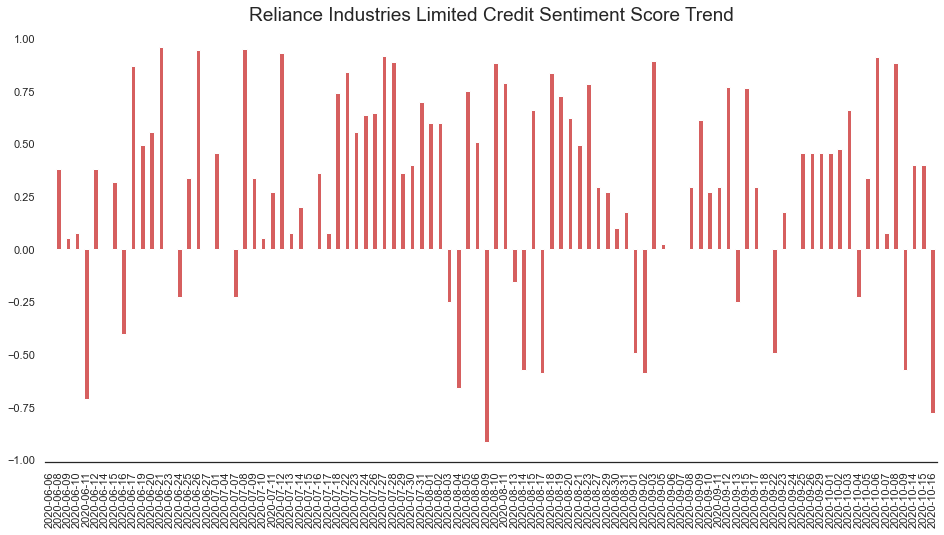

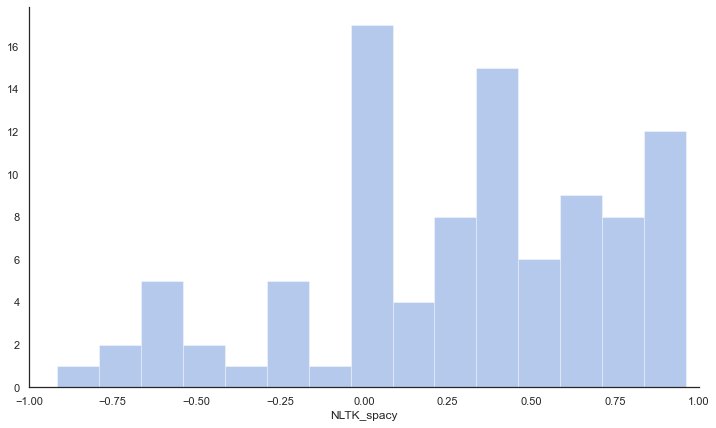

In [11]:
# set some layout / design parameters
sns.set(style="white", palette="muted", color_codes=True)

# bar plot with sentiment over time
ax = df.NLTK_spacy.plot.bar(figsize=(16, 8), color='r')
ax.invert_xaxis()
plt.title("Reliance Industries Limited Credit Sentiment Score Trend", fontsize=19)
sns.despine(left=True)

#plotting histogram
plt.figure(figsize=(12,7))
ax = sns.distplot(df.NLTK_spacy, bins=15, kde=False)
ax.set_xlim(-1,1)
sns.despine()